# Встряхнем пыль времени со старой задачки: отрисуем граф друзей

In [1]:
import requests

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Получение информации 

Для таких развлечений понадобится немного знать API VK - https://vk.com/dev. **Если вкратце**, то нам нужен токен авторизации, поэтому сначала нам нужно завести **приложение типа standalone** и скопировать из его настроек значение Сервисного ключа.
Обязательно стало указывать используемую версию API, это параметр v. Сейчас актуальная **версия 5.74**.

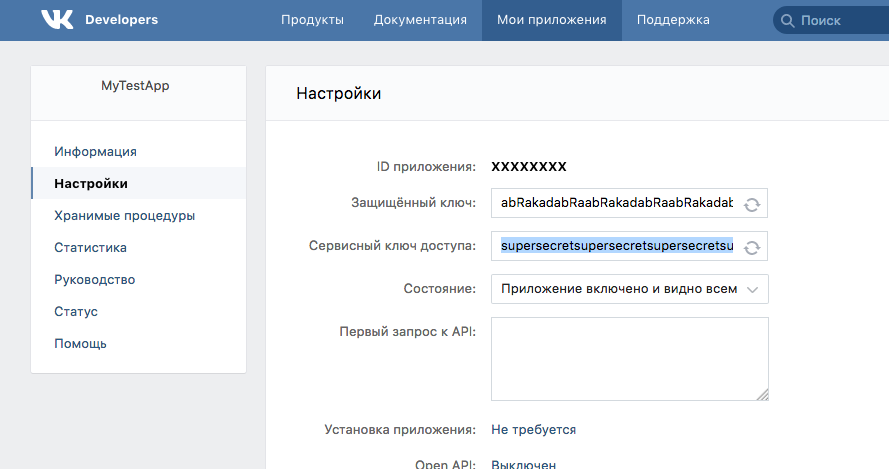

In [2]:
def get_friends(user_id, with_name=False):
    fields = 'first_name,last_name' if with_name else ''
    url = 'https://api.vk.com/method/friends.get?' + \
                        'user_id={}&fields={}&v=5.74&access_token=TOKEN'.format(user_id, fields)
    response = requests.get(url).json()
    if response.get('error'):
        #print(response.get('error'))
        return []
    return response.get('response').get('items')

Быстро узнать ID группы/пользователя - https://regvk.com/id/.

In [3]:
USER_ID = 1260564
users = get_friends(USER_ID, with_name=True)
users = {user_dict['id']: user_dict.get('first_name') + \
                ' ' + user_dict.get('last_name') for user_dict in users}

users[USER_ID] = 'персона Х'

In [4]:
graph = {}

for user_id in users.keys():
    graph[user_id] = get_friends(user_id)

In [5]:
unique_users = set(graph.keys())

for user_friends in graph.values():
    unique_users.update(user_friends)

print('Всего получено различных пользователей ВКонтакте:', len(unique_users))

Всего получено различных пользователей ВКонтакте: 358852


# Граф

In [6]:
g = nx.Graph()
for user_id, user_friends in graph.items():
    g.add_node(users[user_id])
    for friend_id in user_friends:
        if friend_id in users:
            g.add_edge(users[user_id], users[friend_id])

In [7]:
def graph_descr(g):
    print('Вершины графа:\n')
    print('Количество -', g.number_of_nodes())
    print('Средний кластерный коэффициент -', \
          np.average(np.array(list(nx.clustering(g).values()))))
    print('Средняя степень -', \
          np.average(np.array([degree for user_name_, degree in nx.degree(g)])))

In [23]:
#graph_descr(g)

Вершины графа:

Количество - 625
Средний кластерный коэффициент - 0.5242747512509601
Средняя степень - 30.2272


In [11]:
def graph_plot():
    plt.figure(figsize=(12, 9))
    nx.draw_kamada_kawai(g, with_labels=False, node_size=50, width=0.5)
    plt.show()

### Нам нужен граф без центральной вершины

In [8]:
g.remove_node(users[USER_ID])

In [9]:
graph_descr(g)

Вершины графа:

Количество - 624
Средний кластерный коэффициент - 0.41343528620472314
Средняя степень - 28.275641025641026


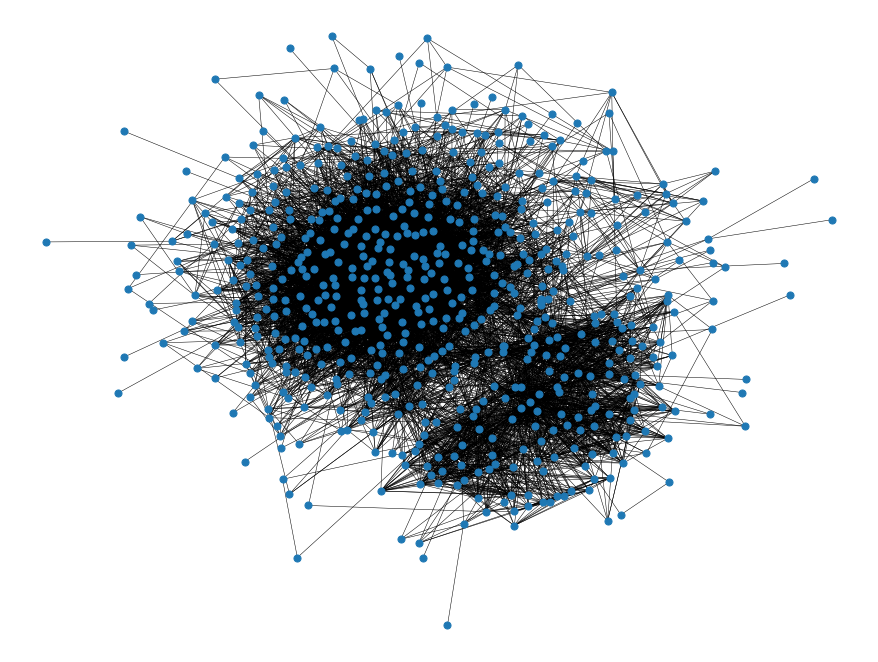

In [12]:
graph_plot()

In [13]:
def graph_save(picture_name, with_labels=False, **kwargs):
    plt.figure(figsize=(60, 45))
    nx.draw_kamada_kawai(g, with_labels=with_labels, node_size=1000, width=1.5, **kwargs)
    plt.savefig(picture_name)

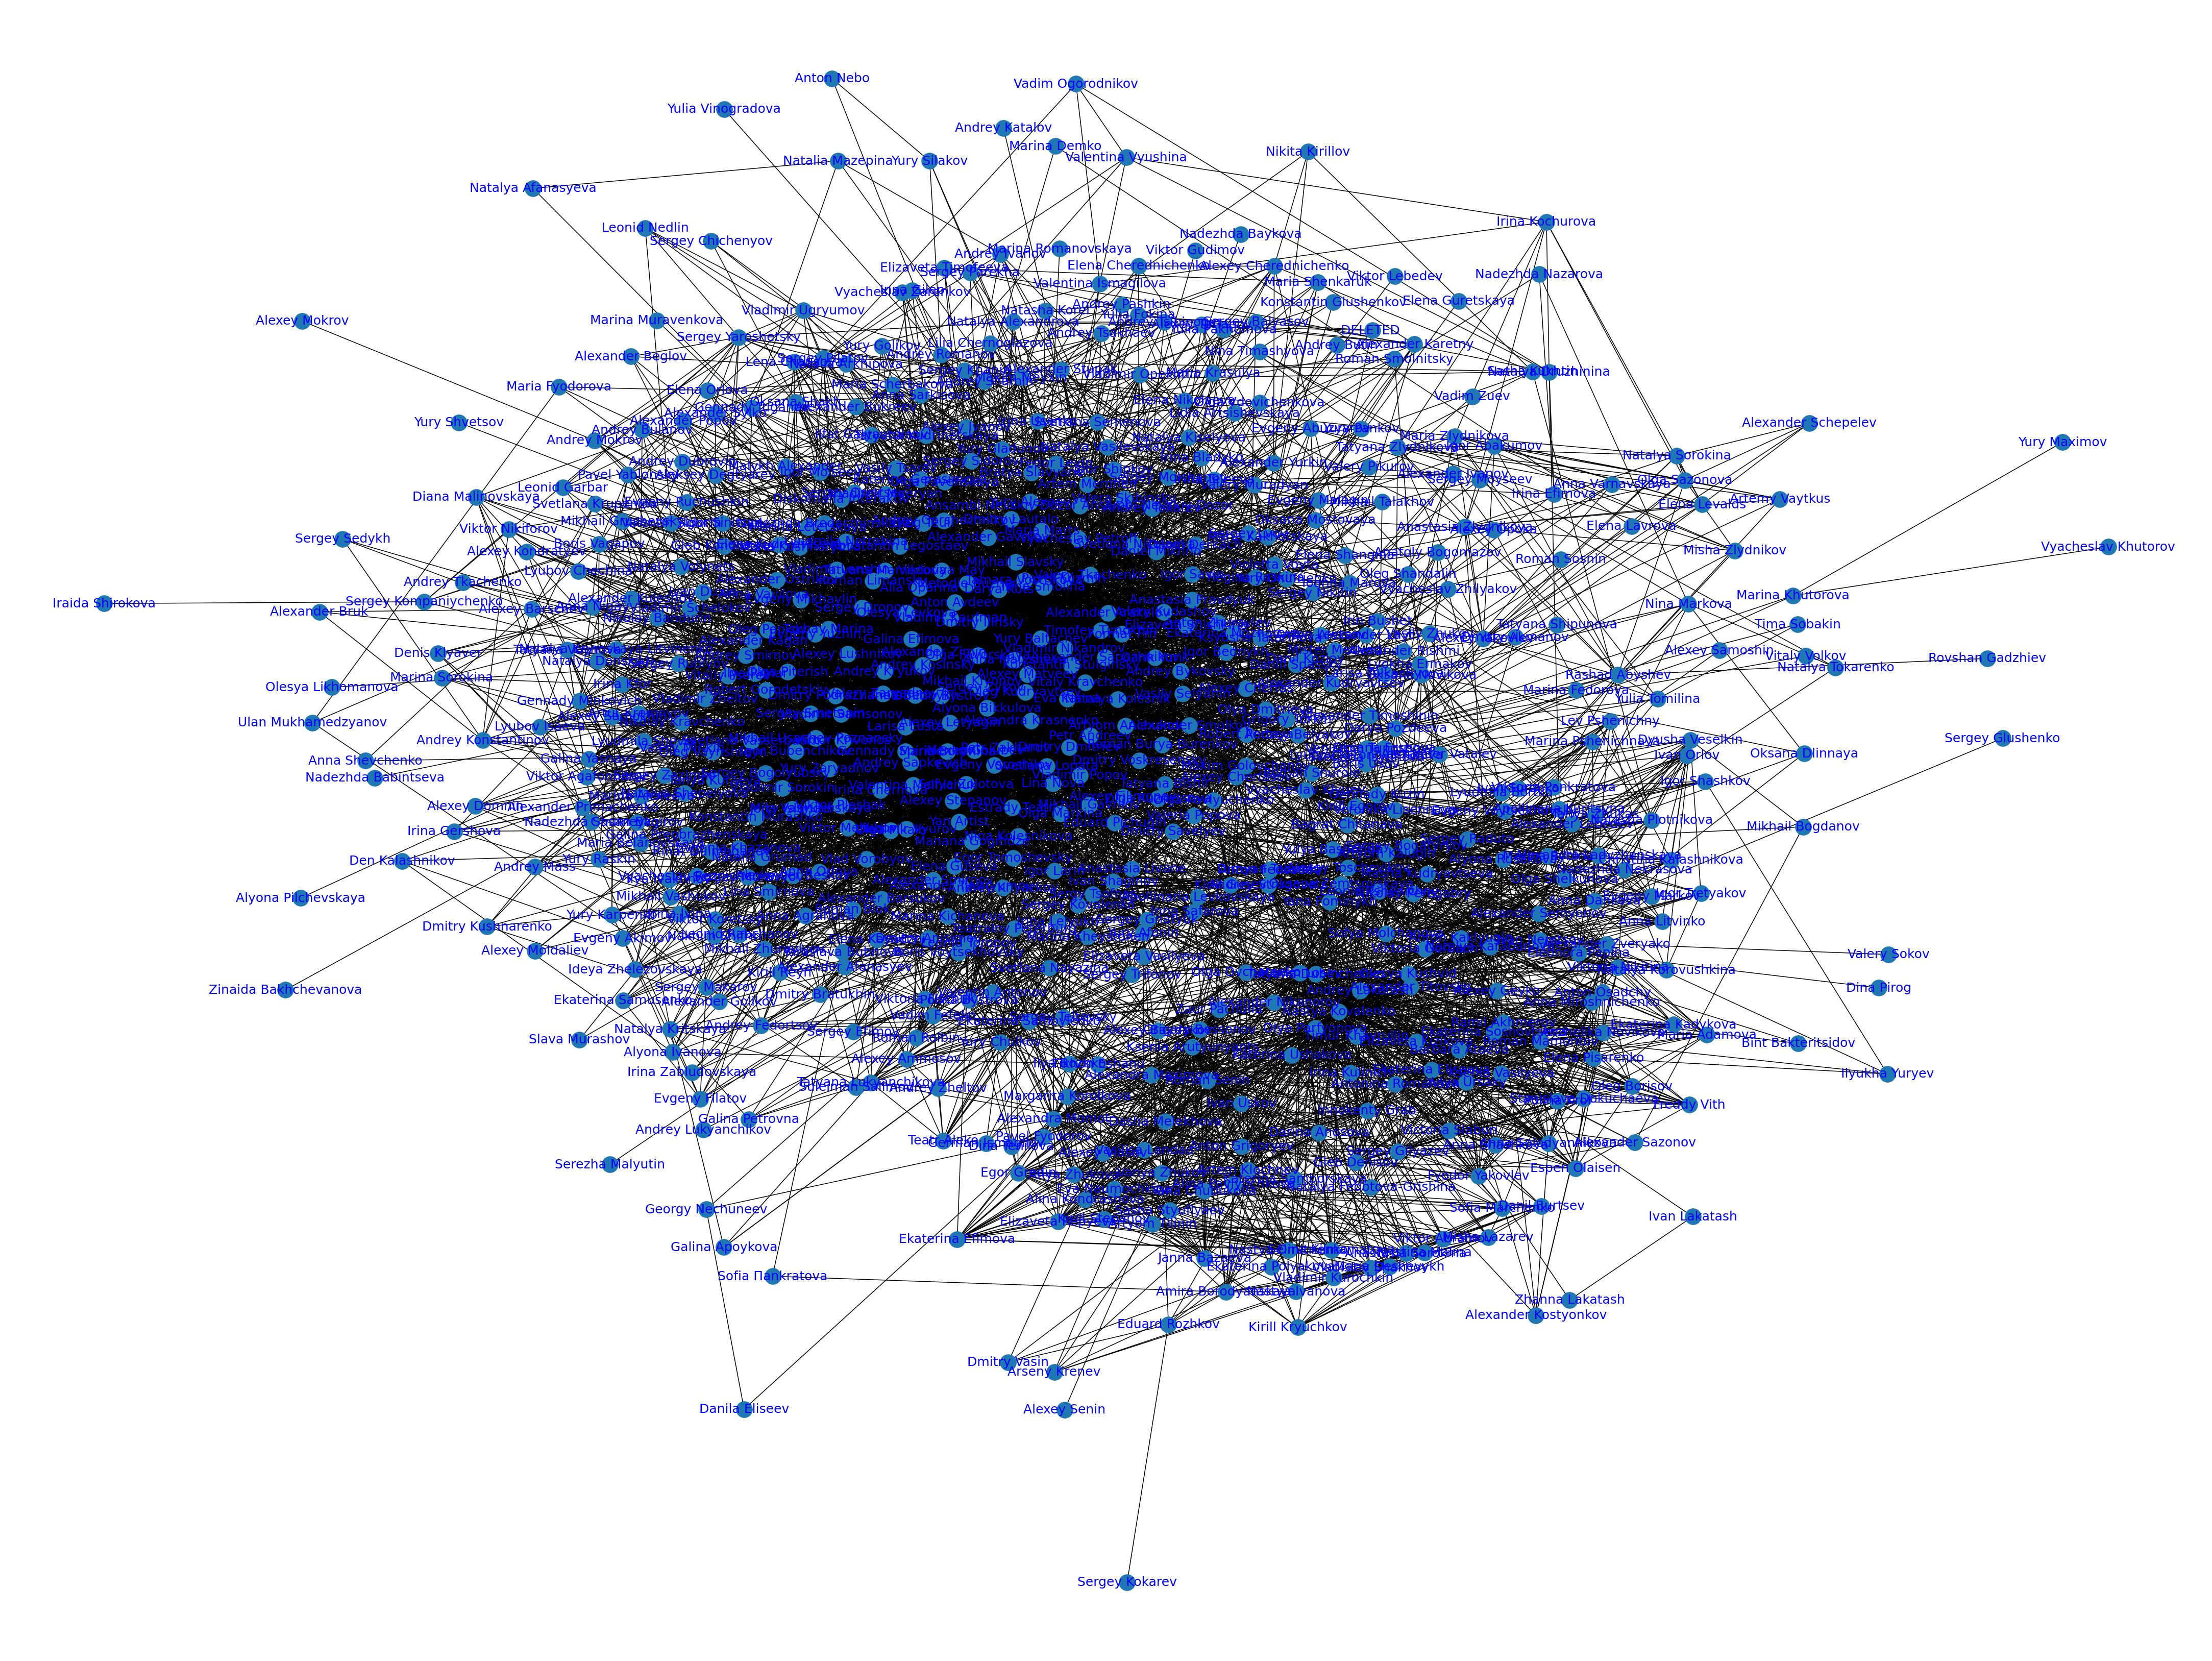

In [15]:
graph_save('friends_labeled.png', with_labels=True, font_size=25, font_color='blue')

In [16]:
nx.write_graphml(g, 'graph.graphml')

## Можно пойти в Gephi и покластеризовать

<img src='https://habrastorage.org/files/4e5/951/790/4e5951790f69438f8d151ccb6401f64e.png'>

Ну и можно развить дальше. 
На основе заведомо известного списка групп социальной сети Вконтакте необходимо построить граф:
вершины — группы социальной сети;
рёбра — наличие общих подписков;
чем больше у данной группы подписчиков, тем больше размер вершины;
чем больше у групп общих пописчиков, тем ближе друг к другу располагаются вершины.